In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lung_cancer_data = pd.read_csv("D:/Hochschule Fresenius notes (sem3)/Artifical Intelligence and Machine Learning/Lung_cancer_project/survey lung cancer.csv", delimiter=",")
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
# Display the first few rows to understand data structure (optional)
# print(lung_cancer_data.head())

# Step 1: Data Preprocessing
# Check for missing values
missing_values = lung_cancer_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [4]:
encoder = LabelEncoder()
lung_cancer_data['GENDER'] = encoder.fit_transform(lung_cancer_data['GENDER'])  # 'M' -> 1, 'F' -> 0
lung_cancer_data['LUNG_CANCER'] = encoder.fit_transform(lung_cancer_data['LUNG_CANCER'])  # 'YES' -> 1, 'NO' -> 0

In [5]:
# Separate features (X) and target (y)
X = lung_cancer_data.drop(columns=['LUNG_CANCER'])
y = lung_cancer_data['LUNG_CANCER']

In [6]:
# Standardize the features to have a mean of 0 and a variance of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split the data into training and testing sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Step 2: Building the Machine Learning Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

In [9]:
# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [11]:
# Step 3: Evaluating the Model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.967741935483871


In [12]:
# Display classification report for detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



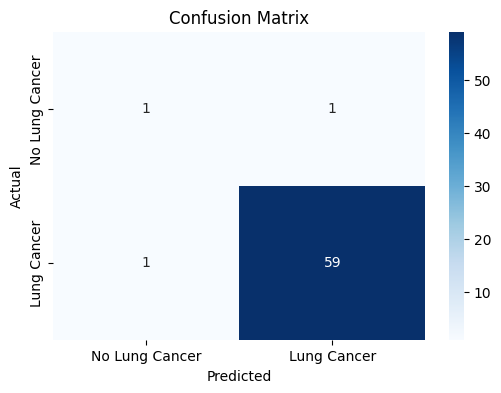

In [13]:
# Compute and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
lung_cancer_data.head(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1


In [ ]:
#data = pd.DataFrame({"GENDER":1,"AGE":"69","SMOKING":1,"YELLOW_FINGERS":2,"ANXIETY":"2","PEER_PRESSURE":"1","CHRONIC_DISEASE":1,"FATIGUE":"2","ALLERGY":"1","WHEEZING":"2","ALCOHOL":"2","COUGHING":"2","SHORTNESS_OF_BREATH":"2","SWALLOWING_DIFFICULTY":"2","CHEST_PAIN":2}, index=[0])
#new_prediction = rf_model.predict(data)
#print(" We predict the patient is ",new_prediction)

In [19]:
first_patient = X_scaled[0].reshape(1, -1)  # Reshape as a single sample for prediction
first_prediction = rf_model.predict(first_patient)
cancer_prediction = 'positive' if first_prediction[0] == 1 else 'Negative'

print("the patient is tested",cancer_prediction,"for cancer")

the patient is tested positive for cancer


In [21]:
import joblib
joblib.dump(rf_model,"Lung_cancer_model")

['Lung_cancer_model']